## Задание:
    
* Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
* Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
* Разделите данные на выборку для обучения и тестирования
* Постройте модель LDA
* Визуализируйте предсказания для тестовой выборки и центры классов
* Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
* Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

## Решение:

### LDA

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [144]:
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [98]:
# Загружаем данные
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
variety = iris.target

In [73]:
# Отбрасываем лишнее
data.drop(['petal length (cm)', 'petal width (cm)'], axis = 1, inplace = True)

In [74]:
# Разбиваем выборку на тестовую и тренировочную
X_train, X_test, y_train, y_test = train_test_split(data, variety, test_size=0.3)

In [92]:
# Строим LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [93]:
# Проверяем точность нашей модели
accuracy_score(result.iloc[:, 0], result.iloc[:, 1])

0.7555555555555555

In [84]:
# Центры классов
lda.means_

array([[5.01428571, 3.46      ],
       [5.92702703, 2.77027027],
       [6.55454545, 2.97272727]])

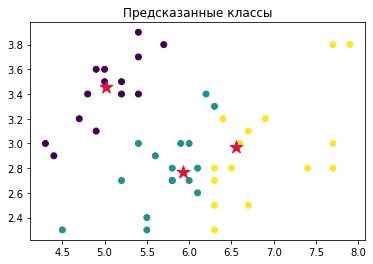

In [101]:
# Визуализируем тестовую выборку (предсказанные значения)
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c=result.iloc[:, 1])
plt.title("Предсказанные классы")
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='crimson', s=180, marker='*')

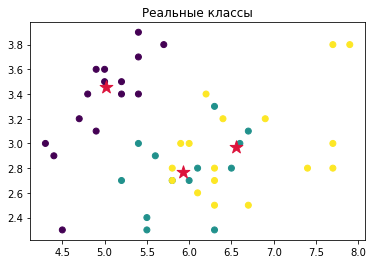

In [102]:
# Визуализируем тестовую выборку (реальные значения)
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c=y_test)
plt.title("Реальные классы")
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='crimson', s=180, marker='*')

### Кластеры

In [65]:
# Строим график локтя
k_inertia = []
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(data)
    k_inertia.append(clf_kmeans.inertia_)

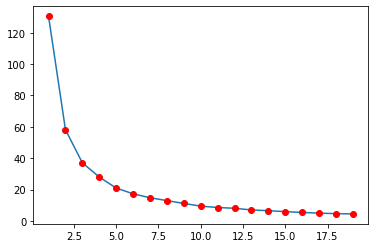

In [66]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

Оптимальными кажутся значения в диапазоне от 3 до 5. Если бы мы не отбросили переменную variety, логично было бы делить данные на три класса. Но раз уж мы ее отбросили, возьмем среднее значение выбранного диапазона — 4 кластера.

Оба столбца данных одной размерности, поэтому попробуем для начала построить кластеры без нормализации данных

In [141]:
kmeans = KMeans(n_clusters=4)
clusters = kmeans.fit_predict(data)

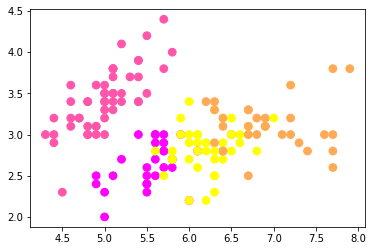

In [142]:
plt.scatter(data['sepal length (cm)'], data['sepal width (cm)'], cmap='spring', c=clusters, s=60)

При всех попытках кластер в левом верхнем углу остается практически неизменным и явно отделенным от других. При этом три оставшихся кластера хаотично перемешиваются при каждой попытке. Все это выглядит не очень здорово. Посмотрим, изменит ли что-нибудь нормализация данных.

In [156]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [157]:
kmeans = KMeans(n_clusters=4)
clusters = kmeans.fit_predict(data_scaled)

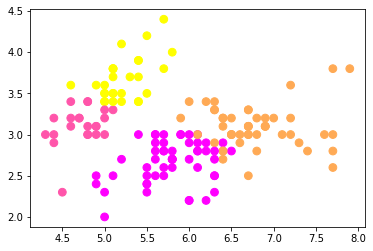

In [149]:
plt.scatter(data['sepal length (cm)'], data['sepal width (cm)'], cmap='spring', c=clusters, s=60)

После нормализации кластеры выглядят совершенно иначе. Верхний кластер разделился на два, а нижние перемешиваются не так хаотично, как в первом случае. У каждого кластера есть более-менее четкая граница. Что интересно, от попытки к попытке структура кластеров практически не меняется.

И хотя до построения этой визуализации выделение данных в левом верхем углу в отдельный кластер выглядело вполне оправданным, такая структура выглядит более логичной и упорядоченной. Интересно, что при практически одинаковом масштабе данных, нормализация привела к таким значительным изменениям.